# World Happiness Report

## Linear Regression Analysis

### Install dependencies

In [4]:
# Install dependencies as needed:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


### Set up variables

In [6]:
# Set the path to the file to load
file_path = "happiness_data.csv"

### Load file

In [8]:
df = pd.read_csv(file_path)

In [9]:
# Look at first 5 records
df.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
0,3.724,7.350,0.451,50.5
1,4.402,7.509,0.552,50.8
2,4.758,7.614,0.539,51.1
3,3.832,7.581,0.521,51.4
4,3.783,7.661,0.521,51.7


In [10]:
# Still seeing a correlation of > 0.7 in all cases. Let's proceed into linear regression analysis, starting by splitting out data into a train set
# and a test set
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3,
                                     random_state=1234)

In [11]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)


(2270, 4)
(1589, 4)
(681, 4)


<Axes: >

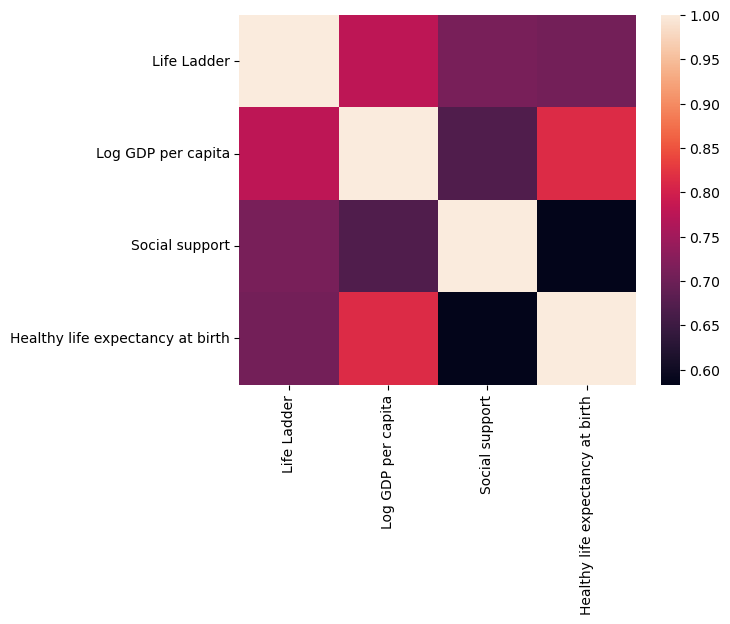

In [12]:
# From now on we work only with the train set
sns.heatmap(df_train.corr())

In [13]:
df_train.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
Life Ladder,1.000000,0.77854,0.711678,0.706456
Log GDP per capita,0.778540,1.00000,0.671070,0.812920
Social support,0.711678,0.67107,1.000000,0.583225
Healthy life expectancy at birth,0.706456,0.81292,0.583225,1.000000


In [14]:
# We need to separate target (y) from the input variables X

X_train = df_train.drop('Life Ladder', axis=1)
X_test = df_test.drop('Life Ladder', axis=1)

y_train = df_train['Life Ladder']
y_test = df_test['Life Ladder']

In [15]:
# we can inspect the arrays
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1589, 3)
(681, 3)
(1589,)
(681,)


D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Happiness distribution')]

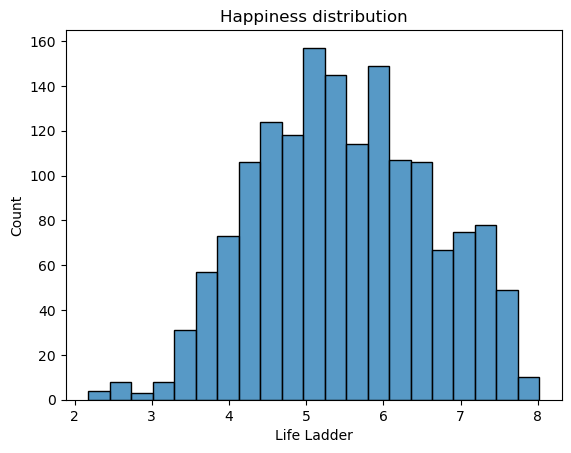

In [16]:
# Let's look at the distribution of the target variable in the train set
sns.histplot(data=df_train, x='Life Ladder').set(title='Happiness distribution')

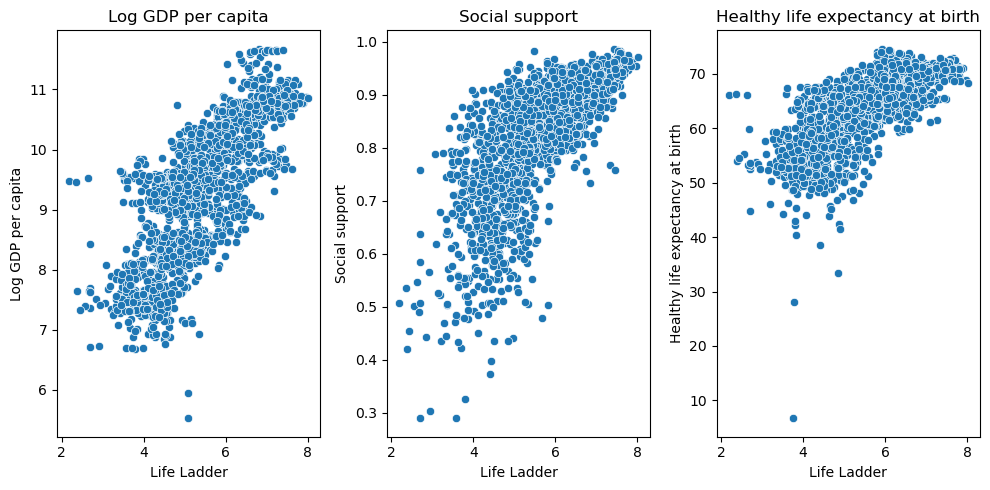

In [17]:
# Let's examine scatterplots of each input variable against the target variable 
# Create the combined plot
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

sns.scatterplot(x ="Life Ladder", y ="Log GDP per capita", data = df_train, ax=axes[0])
axes[0].set_title('Log GDP per capita')

sns.scatterplot(x ="Life Ladder", y ="Social support", data = df_train, ax=axes[1])
axes[1].set_title('Social support')

sns.scatterplot(x ="Life Ladder", y ="Healthy life expectancy at birth", data = df_train, ax=axes[2])
axes[2].set_title('Healthy life expectancy at birth')

plt.tight_layout()
plt.show()

In [18]:
# Training the model
# documentation:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))   # this is R squared we wills see again in metrics

0.7121476823613421


In [19]:
# Get the intercept and coefficients
print(model.intercept_)
pd.DataFrame(zip(X_train.columns, model.coef_))

-2.725212984391603


,0,1
0,Log GDP per capita,0.404557
1,Social support,3.103000
2,Healthy life expectancy at birth,0.029841


Predicted Life Ladder = -2.725 + (0.404557 * Log GDP per capita) + (3.103000 * Social support) + (0.029841 * Healthy life expectancy at birth)

In [21]:
# get predicted results for train set
y_pred = model.predict(X_test)
y_pred[:10] # print first 10 values

array([5.27174235, 5.46887845, 6.48743223, 6.86468563, 5.94384384,
       5.89227676, 6.55013224, 6.33026709, 4.09368096, 6.19368291])

[Text(0.5, 1.0, 'Actual v Predicted Scores')]

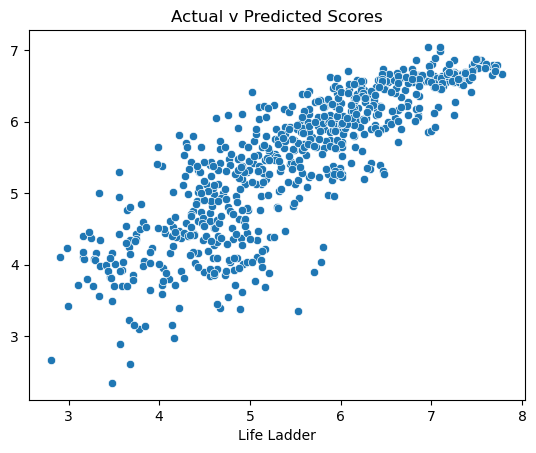

In [22]:
# Explore how accurate our model is
# Data scatter of predicted values

sns.scatterplot(x = y_test, y =y_pred).set(title='Actual v Predicted Scores')


In [23]:
#Function to help calculate the MAPE
# this is a helper function that when used will return MAPE (mean_absolute_percentage_error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    try:
      difference = y_true - y_pred
      actual = y_true
      absolute_pct_error = np.mean(np.abs(difference / actual)) * 100
    except Exception:
      absolute_pct_error = 0
    return np.round(absolute_pct_error, decimals=2)

In [24]:
# Run the metrics
# now we need to run our models and evaluate their performance
from sklearn.linear_model import LinearRegression
import sklearn.metrics as met  # https://scikit-learn.org/stable/api/sklearn.metrics.html

# Step 1: initialise the model with its key arguments - if any
model = LinearRegression()

# Step 2: train the model on X_train
model.fit(X_train, y_train)

# Step 3: predict y_pred based on X_test
y_pred = model.predict(X_test)

# Step 4: evaluate and compare y_test vs. y_pred
r2_score = met.r2_score(y_test, y_pred)
# rmse - root mean squared error - unit level
rmse = float(format(np.sqrt(met.mean_squared_error(y_test,y_pred)),'.3f'))
# in % +-
mape = mean_absolute_percentage_error(y_test, y_pred) 


print("R-squared ", r2_score)
print("Root Mean Squared Error ", rmse)
print("Mean Absolute Percentage Error ", mape)

R-squared  0.7121476823613421
Root Mean Squared Error  0.605
Mean Absolute Percentage Error  9.57
